In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# read .csv
usecols = ['Category', 'Title', 'Transcript']
df_raw = pd.read_csv("1_raw_data.csv", usecols = usecols)
#df_raw = pd.read_csv("1_raw_data.csv")

In [13]:
df_raw

,Title,Category,Transcript
0,Former CIA Agent Breaks Down Jeffrey Epstein Case,Blog,the Joe Rogan experience well how about the ot...
1,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
2,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
3,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
4,What's The Most Dangerous Place on Earth?,Science,"Hey, Vsauce. Michael here. 93% of all the\r\nh..."
...,...,...,...
1876,$17 Fried Chicken Vs. $500 Fried Chicken,Entertainment,- Oh look who it is. Andrew! Andrew! - How did...
1877,Extracting DNA from strawberries and eating it,Science,Deoxyribonucleic acid or DNA for short is the ...
1878,Pool's Closed,"Comedy,Informative",(Introduction) (Introduction)\r\nOFFICER: The ...
1879,Hunting Puffins On The Edge Of A Cliff In Icel...,Food,Iceland is a stunning volcanic melting pot on ...


In [11]:
df = df_raw.sample(frac=1, random_state=259).reset_index(drop=True) # sample raw data once first
df['data point ID'] = df.index

# annotator initial
df['label_TW'] = None
df['label_YY'] = None
df['label_JR'] = None

df['adjucate_TW'] = None
df['adjucate_YY'] = None
df['adjucate_JR'] = None

df

,Title,Category,Transcript,data point ID,label_TW,label_YY,label_JR,adjucate_TW,adjucate_YY,adjucate_JR
0,Top Gear : Bugatti Veyron vs Euro Fighter - To...,"Automobile,Comedy","Yeah... Now a year ago, Jeremy raced\r\nJames ...",0,None,None,None,None,None,None
1,The Roswell Incident,"Blog,Comedy",This evening we're going to explore the story....,1,None,None,None,None,None,None
2,What Is The Deadliest Substance On Earth? Toxi...,Informative,Can you imagine settling down to watch a movie...,2,None,None,None,None,None,None
3,Windows 11 is REAL!?,"Tech,News","- Oh, man. TFW you get to do the tech news aga...",3,None,None,None,None,None,None
4,The Ultimate PlayStation Comparison,Tech,"- Hey guys, this is Austin, and welcome to the...",4,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
76,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",76,None,None,None,None,None,None
77,Jeffrey Epstein and the Nature of Evil | Eric ...,"Blog,Science",can we talk a little bit about evil sure i hav...,77,None,None,None,None,None,None
78,Celebrities Impersonating Other Celebrities - ...,"Entertainment,Comedy",[Music] / fear man must stand alone Will Smith...,78,None,None,None,None,None,None
79,Captain D's Definitive Guide to TRICK SHOTS,Informative,So you're a kid or International Brand that wa...,79,None,None,None,None,None,None


In [6]:
# Rearange cols
df.columns
col_a = ['label_TW','label_YY', 'label_JR', 'adjucate_TW', 'adjucate_YY', 'adjucate_JR', 'Title', 'Category', 'Transcript', 'data point ID']
df = df[col_a]

In [7]:
df_exploration = df.iloc[0:500]
df_exploration = df_exploration.sort_values(['Category'])
df_exploration

,label_TW,label_YY,label_JR,adjucate_TW,adjucate_YY,adjucate_JR,Title,Category,Transcript,data point ID
70,None,None,None,None,None,None,2021 Mercedes-Maybach GLS600 vs Rolls-Royce Cu...,Automobile,thomas don't do the thing it's not necessary i...,70
20,None,None,None,None,None,None,The Differences Between Petrol and Diesel Engines,Automobile,the differences between petrol and diesel engi...,20
14,None,None,None,None,None,None,Mercedes Actros vs Scania R500 - DRAG RACE & 4...,Automobile,hi everyone matt watson here from car wow i'm ...,14
0,None,None,None,None,None,None,Top Gear : Bugatti Veyron vs Euro Fighter - To...,"Automobile,Comedy","Yeah... Now a year ago, Jeremy raced\r\nJames ...",0
65,None,None,None,None,None,None,"Jeremy Clarkson, Richard Hammond and James May...","Automobile,Comedy",Jeff wants us to be more American the problem ...,65
...,...,...,...,...,...,...,...,...,...,...
40,None,None,None,None,None,None,"Good luck selling Playstations, Sony!","Tech,News","- Now you listen here, okay? If you don't give...",40
5,None,None,None,None,None,None,Bloodborne with ENB - 016 - Eileen End - Iosef...,VideoGames,what's up y'all welcome back to your honor met...,5
47,None,None,None,None,None,None,Battlefield 4 Best Guns For All Classes,VideoGames,hey guys level-cap here today I'm going to be ...,47
43,None,None,None,None,None,None,CS:GO Pistols Tutorial,VideoGames,greetings I the war al greets you this video i...,43


In [8]:
df_evaluation = df.iloc[501:1001]
df_evaluation = df_evaluation.sort_values(['Category'])
df_evaluation

,label_TW,label_YY,label_JR,adjucate_TW,adjucate_YY,adjucate_JR,Title,Category,Transcript,data point ID


In [9]:
print("# of categories:", len(np.unique(df['Category'])))
# Number of entries per category
print(df.groupby('Category').size())
print('Min size:', min(df.groupby('Category').size()))

# of categories: 20
Category
Automobile               3
Automobile,Comedy        6
Blog                     9
Blog,Comedy              3
Blog,Entertainment       2
Blog,Science             1
Comedy,Entertainment     2
Comedy,Informative       2
Entertainment            1
Entertainment,Comedy     3
Food                    11
Food,Entertainment       1
Informative              5
News                     9
Science                  7
Tech                     8
Tech,Comedy              1
Tech,Informative         1
Tech,News                2
VideoGames               4
dtype: int64
Min size: 1


In [ ]:
df_selected = pd.concat([df_exploration, df_evaluation], ignore_index=True)
df_selected

,label_TW,label_YY,label_JR,adjucate_TW,adjucate_YY,adjucate_JR,Title,Category,Transcript,data point ID
0,None,None,None,None,None,None,2020 Toyota 4Runner TRD Pro vs The V8 4Runner ...,Automobile,so uh so yeah I like the one thing that Toyota...,0
1,None,None,None,None,None,None,2021 Ford F-150 POWERBOOST Review - INCREDIBLE!,Automobile,[Music] i'm here i'm jacob going for a drive [...,32
2,None,None,None,None,None,None,How to Repair Rust on Your Car Without Welding...,Automobile,Hey guys chrisfix here and today i'm gonna sho...,365
3,None,None,None,None,None,None,How to Remove Snow WITHOUT Scratching your Car...,Automobile,hey guys chris fix here with a chris fix quick...,358
4,None,None,None,None,None,None,2021 RAM TRX vs 770HP Shelby F-150 Super Snake...,Automobile,you're watching throttle house i'm thomas and ...,341
...,...,...,...,...,...,...,...,...,...,...
995,None,None,None,None,None,None,Try Not To Laugh Challenge #16,VideoGames,"Mark: Hello everybody, my name is Markiplier a...",721
996,None,None,None,None,None,None,TRY TO STOP! | Happy Wheels - Part 89,VideoGames,*wa-PSSH* TOP OF THE MORNIN' TO YA LADDIES MMM...,684
997,None,None,None,None,None,None,The Windows Me Experience: Was It THAT Bad?,VideoGames,[jazzy millennium music] Greetings and welcome...,582
998,None,None,None,None,None,None,Insurgency - A True Tactical Shooter,VideoGames,hey guys level-cap here today I want to talk t...,673


In [ ]:
df_selected.to_csv('3_annotate_data.csv')

# Visualization

In [41]:
single_cate = ['Automobile','Blog','Comedy','Entertainment','Food','Informative','News', 'Science', 'Tech','VideoGames']

# Number of video is in single category
df_raw['Single Category'] = ''
for r in np.arange(df_raw.shape[0]):
  if df_raw['Category'].iloc[r] in single_cate:
    df_raw.loc[r, 'Single Category'] = True
  else:
    df_raw.loc[r, 'Single Category'] = False


In [128]:
df_plot = df_raw.copy()
df_plot = df_plot[['Category','Single Category']]
df_plot = df_plot.groupby(['Category','Single Category'], as_index=False).size()
df_plot = df_plot.sort_values('Single Category').reset_index(drop=True)

In [143]:
explode = []
for bi in df_plot['Single Category']:
  if bi==False:
    explode.append(0.1)
  else:
    explode.append(0)

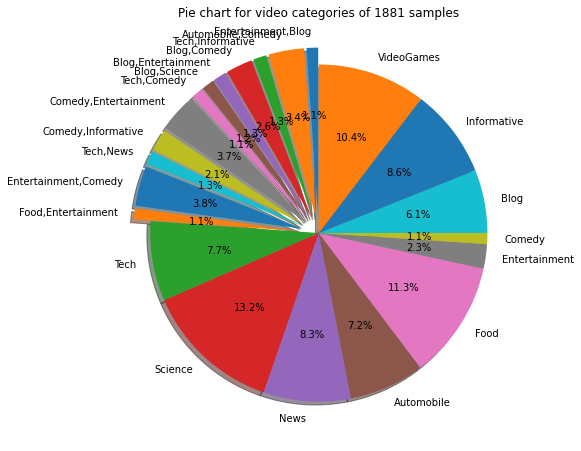

In [146]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(df_plot['size'],explode=explode, labels=df_plot['Category'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Pie chart for video categories of 1881 samples')
plt.tight_layout()

In [136]:
1432/1881

0.7612971823498139